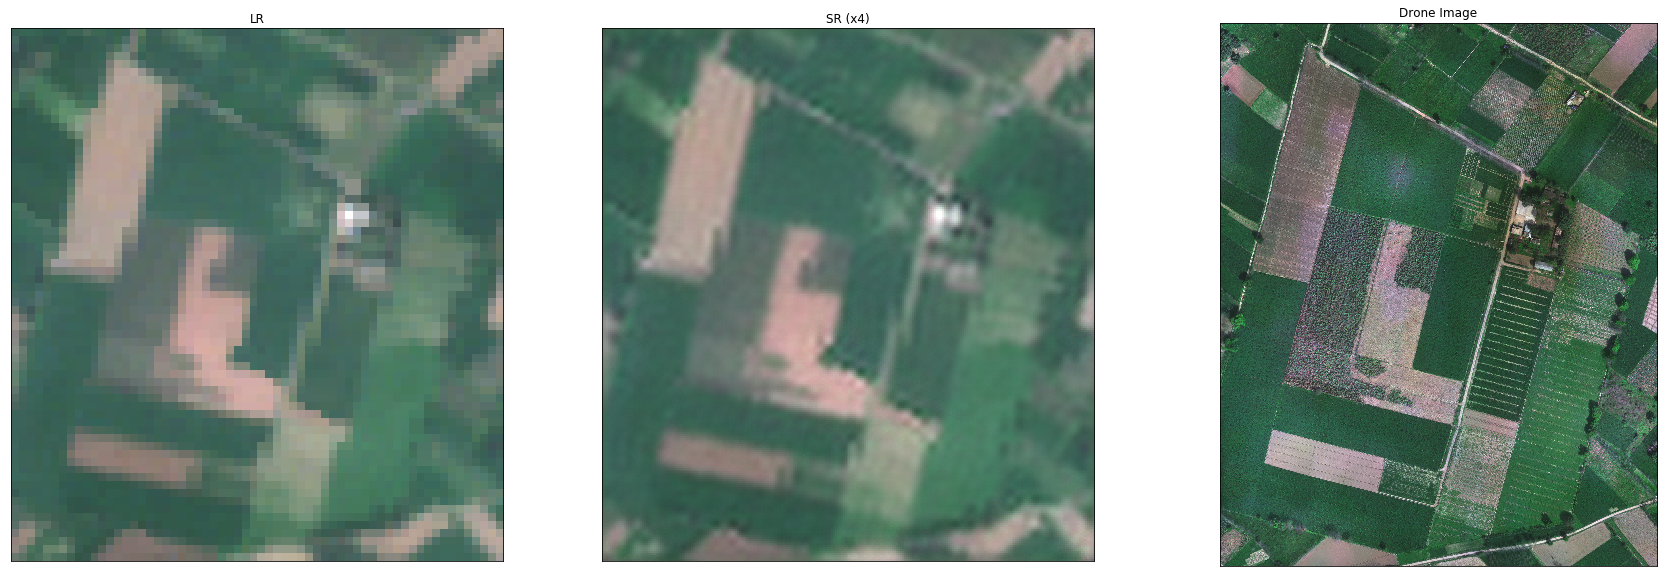

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from models import resolve_single
from models.edsr import edsr
from models.common import evaluate

from utils import load_image, plot_sample

from data import drone_data

def plot_samples(lr, sr, fr):
    plt.figure(figsize=(30, 10))

    images = [lr, sr, fr]
    titles = ['LR', f'SR (x{sr.shape[0] // lr.shape[0]})', f'Drone Image']

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 3, i+1)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])


valid_loader = drone_data(subset='valid')
valid_ds = valid_loader.dataset(batch_size=1, repeat_count=1)

sat_img_path = f'satellite_rgb/Subset_projected_S2B_MSIL2A_20190306T052709_N0211_R105_T43RGP_20190306T101639.png'
drone_img_path = f'drone_rgb/08032019_subset_proj_1.png'

model = edsr(scale=4, num_res_blocks=16)
model.load_weights('weights/edsr-16-x4/weights.h5')

lr = load_image(sat_img_path)
fr = load_image(drone_img_path)

sr = resolve_single(model, lr)
plot_samples(lr, sr, fr)

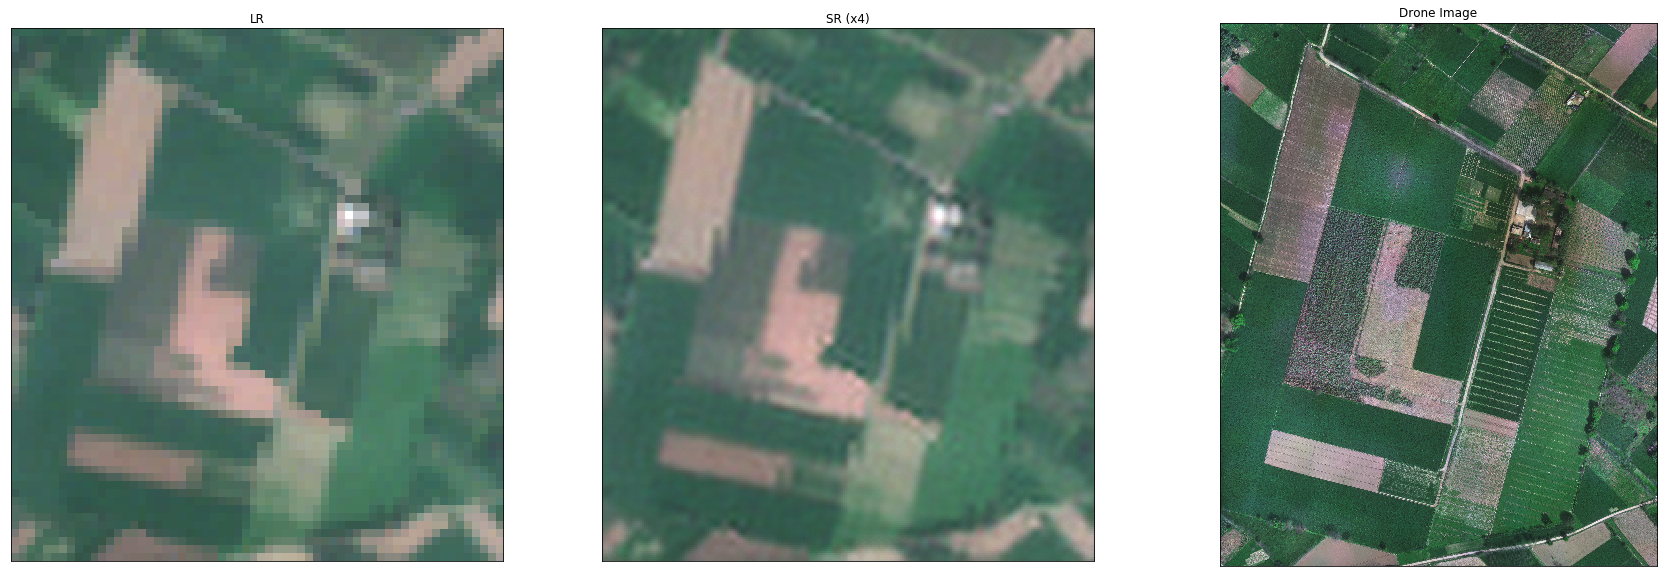

In [4]:
from models.wdsr import wdsr_b

model = wdsr_b(scale=4, num_res_blocks=32)
model.load_weights('weights/wdsr-b-32-x4/weights.h5')

sr = resolve_single(model, lr)
plot_samples(lr, sr, fr)

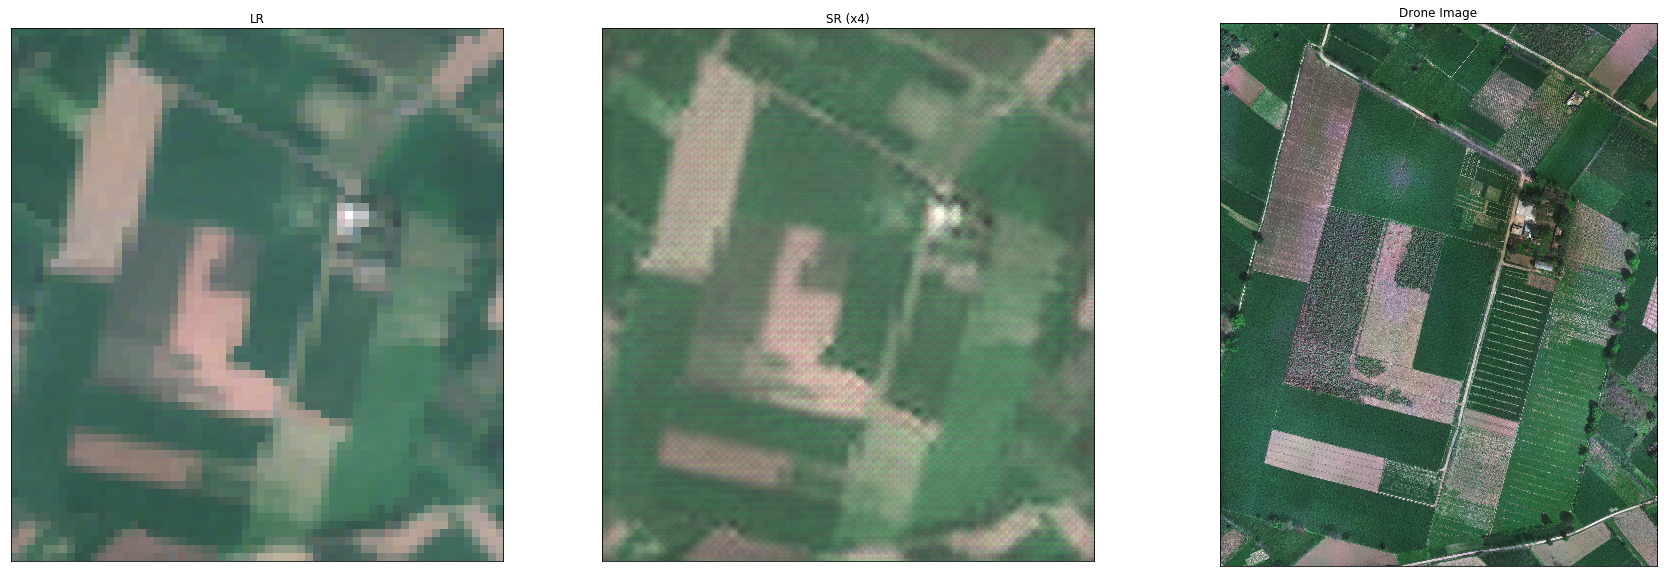

In [11]:
model = edsr(scale=4, num_res_blocks=16)
model.load_weights('weights/edsr-16-x4/finetuned_weights.h5')

sr = resolve_single(model, lr)
plot_samples(lr, sr, fr)

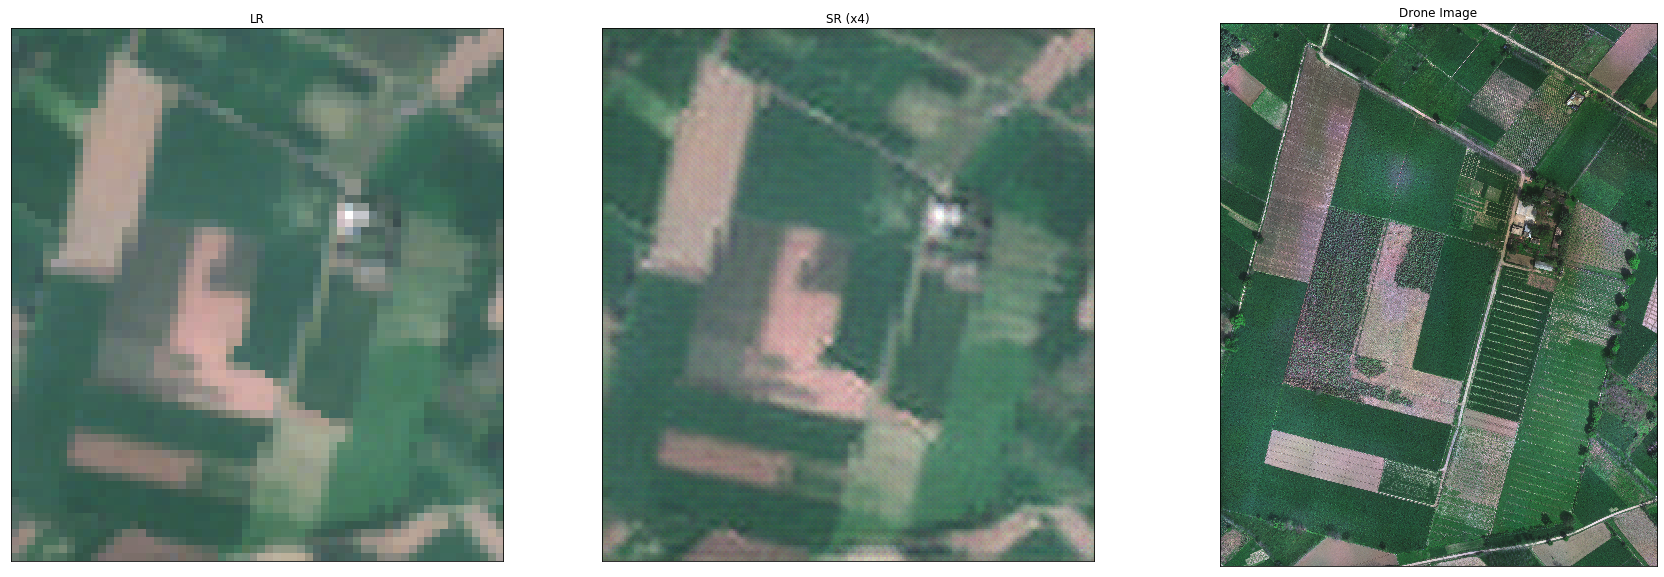

In [12]:
model = wdsr_b(scale=4, num_res_blocks=32)
model.load_weights('weights/wdsr-b-32-x4/finetuned_weights.h5')

sr = resolve_single(model, lr)
plot_samples(lr, sr, fr)

# Pre trained weights downloaded from Github

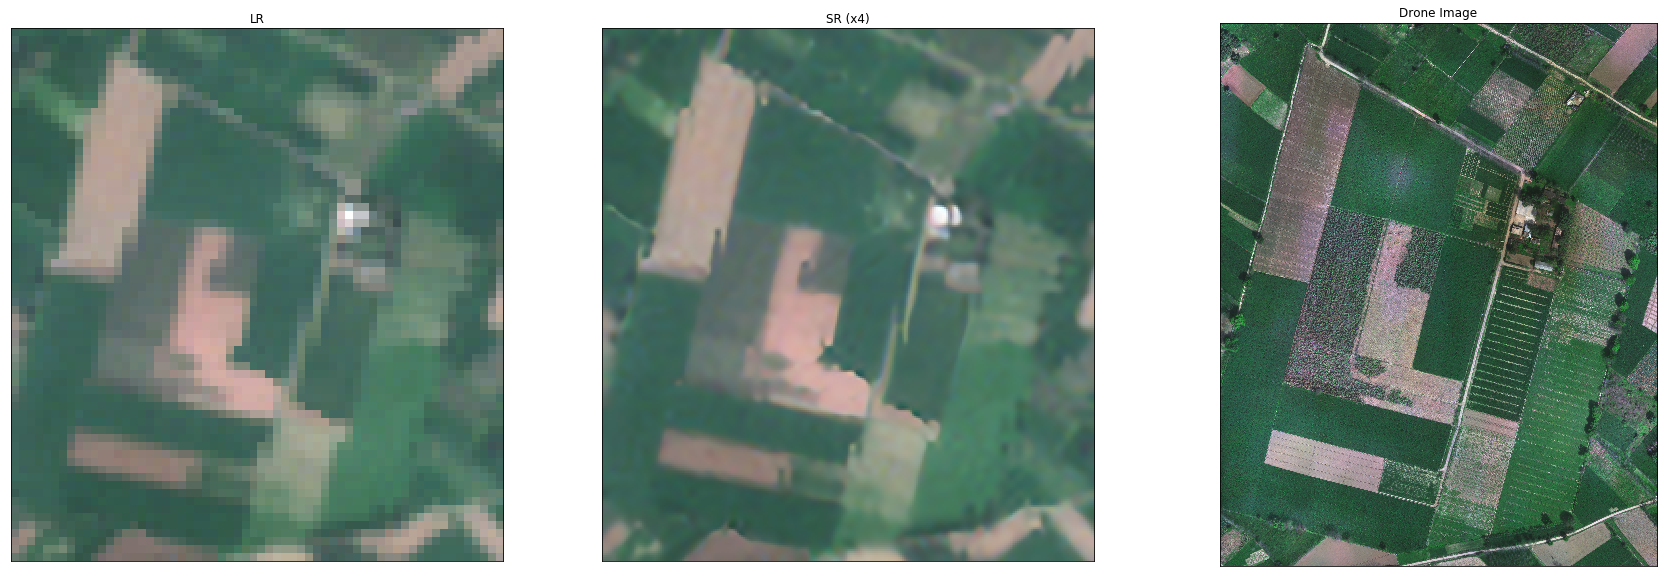

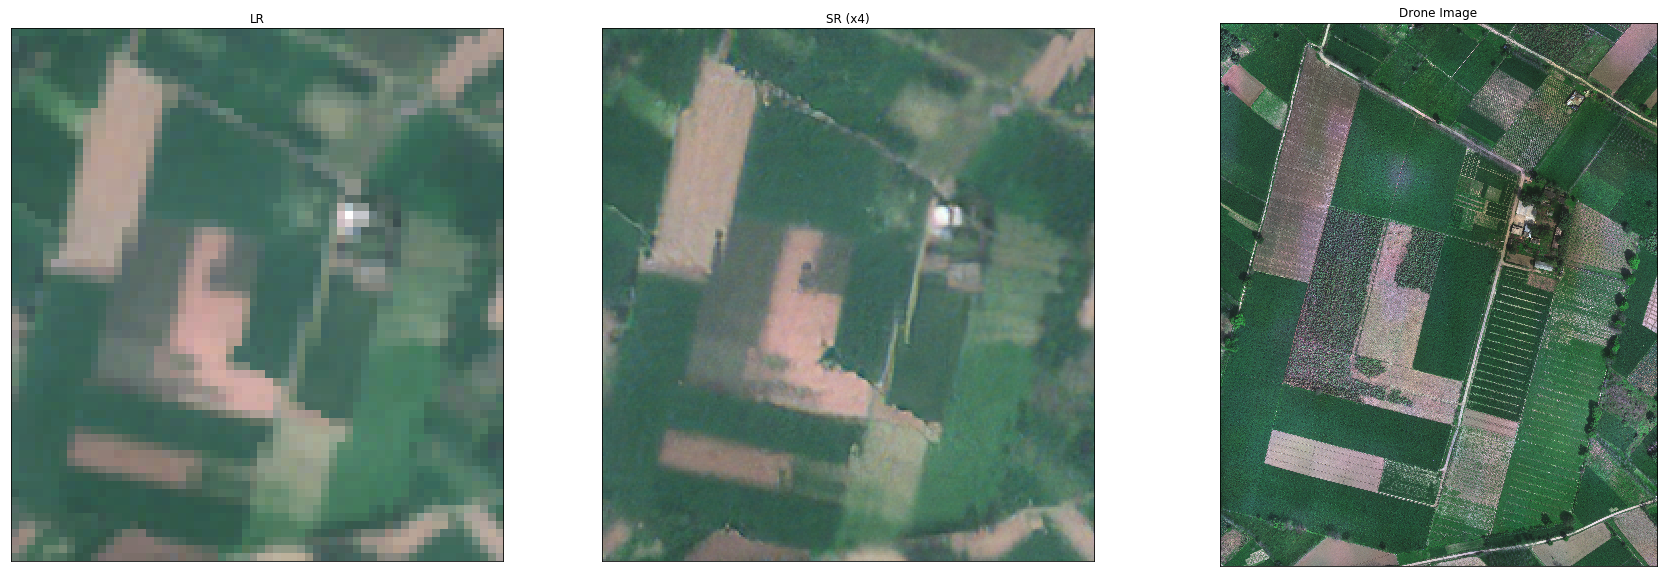

In [13]:
model = edsr(scale=4, num_res_blocks=16)
model.load_weights('weights/weights/article/weights-edsr-16-x4.h5')

sr = resolve_single(model, lr)
plot_samples(lr, sr, fr)


model.load_weights('weights/weights/article/weights-edsr-16-x4-fine-tuned.h5')
sr = resolve_single(model, lr)
plot_samples(lr, sr, fr)

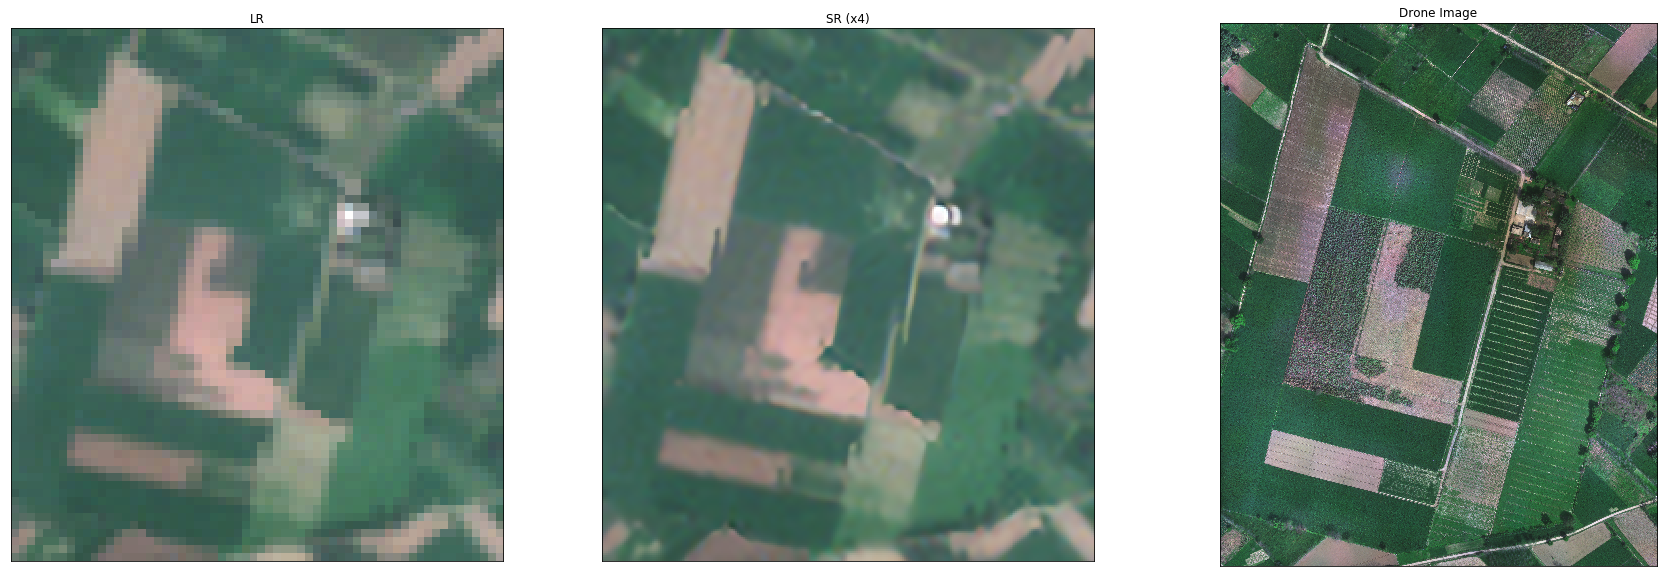

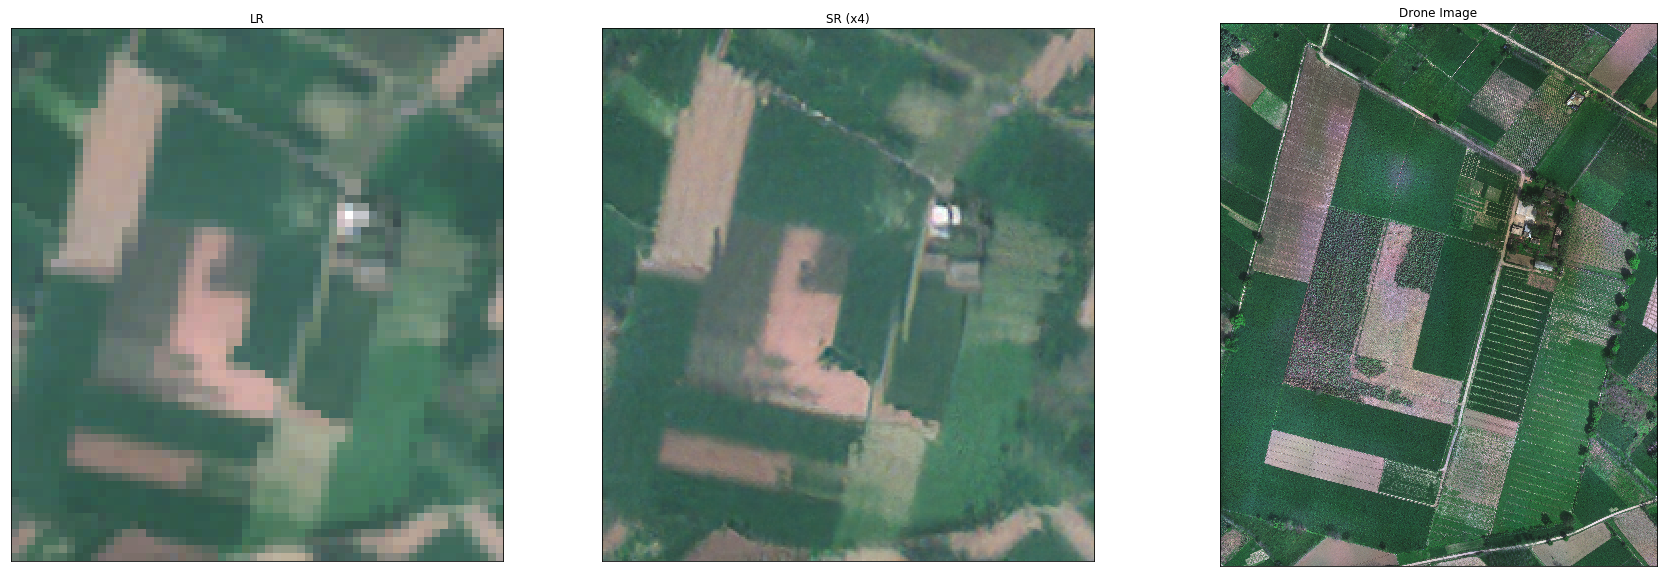

In [6]:
model = wdsr_b(scale=4, num_res_blocks=32)
model.load_weights('weights/weights/article/weights-wdsr-b-32-x4.h5')

sr = resolve_single(model, lr)
plot_samples(lr, sr, fr)


model.load_weights('weights/weights/article/weights-wdsr-b-32-x4-fine-tuned.h5')
sr = resolve_single(model, lr)
plot_samples(lr, sr, fr)